In [95]:
import sys

sys.path.append('../GraphStructureLearning')

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

from glob import glob
import pickle
import yaml
from easydict import EasyDict as edict

from torch_geometric.utils import to_dense_adj, dense_to_sparse

In [97]:
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  after removing the cwd from sys.path.


In [98]:
adj_matrix = np.load('./data/METR-LA/adj_mat.npy')

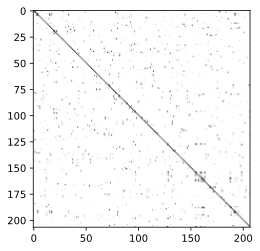

In [99]:
plt.imshow(adj_matrix, cmap='Greys')
plt.savefig('./GroudTruth_adj.png')

In [100]:
edge_index_g, _ = dense_to_sparse(torch.Tensor(adj_matrix))

In [101]:
edge_index_g.shape

torch.Size([2, 1722])

In [102]:
exp_dirs = glob('./exp/METR_LA/*')
exp_dirs.sort()
exp_dirs

['./exp/METR_LA/GTS_METR_LA_0321_031950',
 './exp/METR_LA/GTS_METR_LA_0328_010843']

In [103]:
exp = exp_dirs[0]

In [104]:
config_file = glob(exp+'/*.yaml')[0]
config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

In [105]:
train_result_dirs = glob(exp+'/training_result.pickle')
train_result = pickle.load(open(train_result_dirs[0], 'rb'))

test_result_dirs = glob(exp+'/test_result.pickle')
test_result = pickle.load(open(test_result_dirs[0], 'rb'))

In [106]:
train_result.keys()

dict_keys(['train_loss', 'val_loss', 'val_adj_matirix'])

In [107]:
test_result.keys()

dict_keys(['test_loss', 'adj_matrix', 'prediction', 'target'])

In [108]:
edge_ = []

for i in range(50):
    edge_.append(train_result['val_adj_matirix'][i].shape[1])

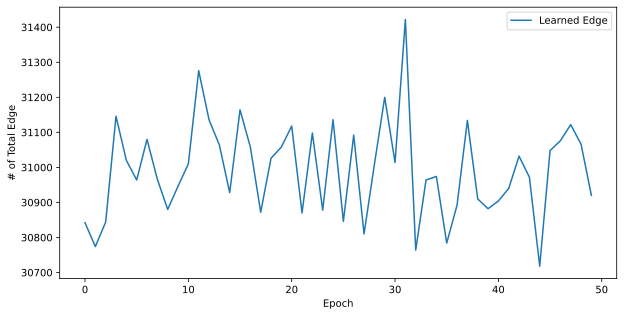

In [109]:
f, axes = plt.subplots(figsize=(10, 5))


axes.plot(edge_, label = 'Learned Edge')
axes.set_xlabel('Epoch')
axes.set_ylabel('# of Total Edge')
axes.legend()

f.savefig('./edge_result.png')

In [110]:
learn_adj = to_dense_adj(test_result['adj_matrix'].detach().cpu())
learn_edge_index = test_result['adj_matrix'].detach().cpu()

In [111]:
learn_edge_index.shape

torch.Size([2, 31070])

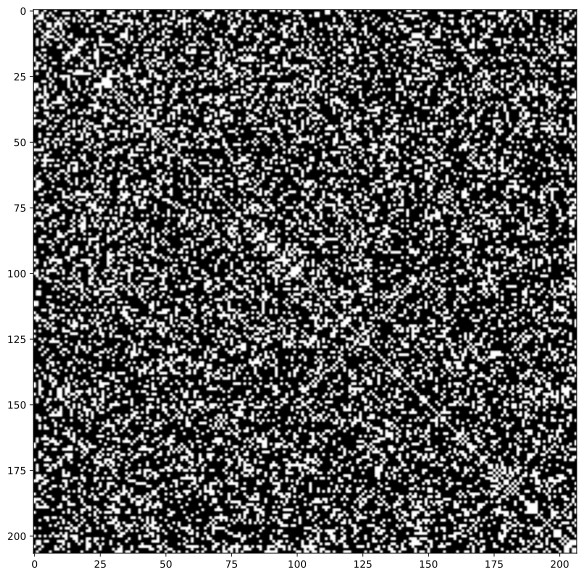

In [112]:
f, axes = plt.subplots(figsize=(10,10))

axes.imshow(learn_adj[0], cmap='Greys')
f.savefig('./learned_adj_matrix.png')

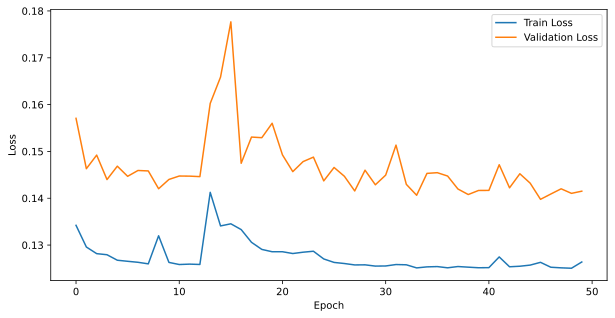

In [113]:
f, axes = plt.subplots(figsize=(10, 5))

axes.plot(train_result['train_loss'], label='Train Loss')
axes.plot(train_result['val_loss'], label='Validation Loss')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

f.savefig('./Learning_curve.png')

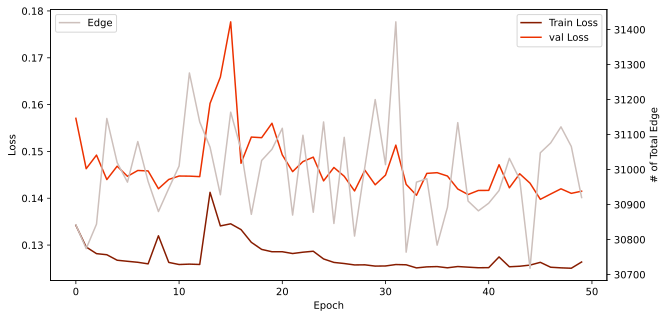

In [114]:
f, axes = plt.subplots(figsize=(10, 5))
epoch = np.arange(50)

axes.plot(epoch, train_result['train_loss'], label='Train Loss', color='#871C00')
axes.plot(epoch, train_result['val_loss'], label='val Loss', color='#EC3100')
axes.tick_params(axis='y')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

axes2 = axes.twinx()
axes2.plot(epoch, edge_, label='Edge', color='#CDC0BC')
axes2.tick_params(axis='y')
axes2.set_ylabel('# of Total Edge')
axes2.legend(loc='upper left')

f.savefig('./relation_edge_loss.png')

In [115]:
len(test_result['target'])

3426

In [116]:
targets = torch.stack(test_result['target'])
pred = torch.stack(test_result['prediction'])

In [117]:
pred = torch.swapaxes(pred, 0, 1)
targets = torch.swapaxes(targets, 0, 1)

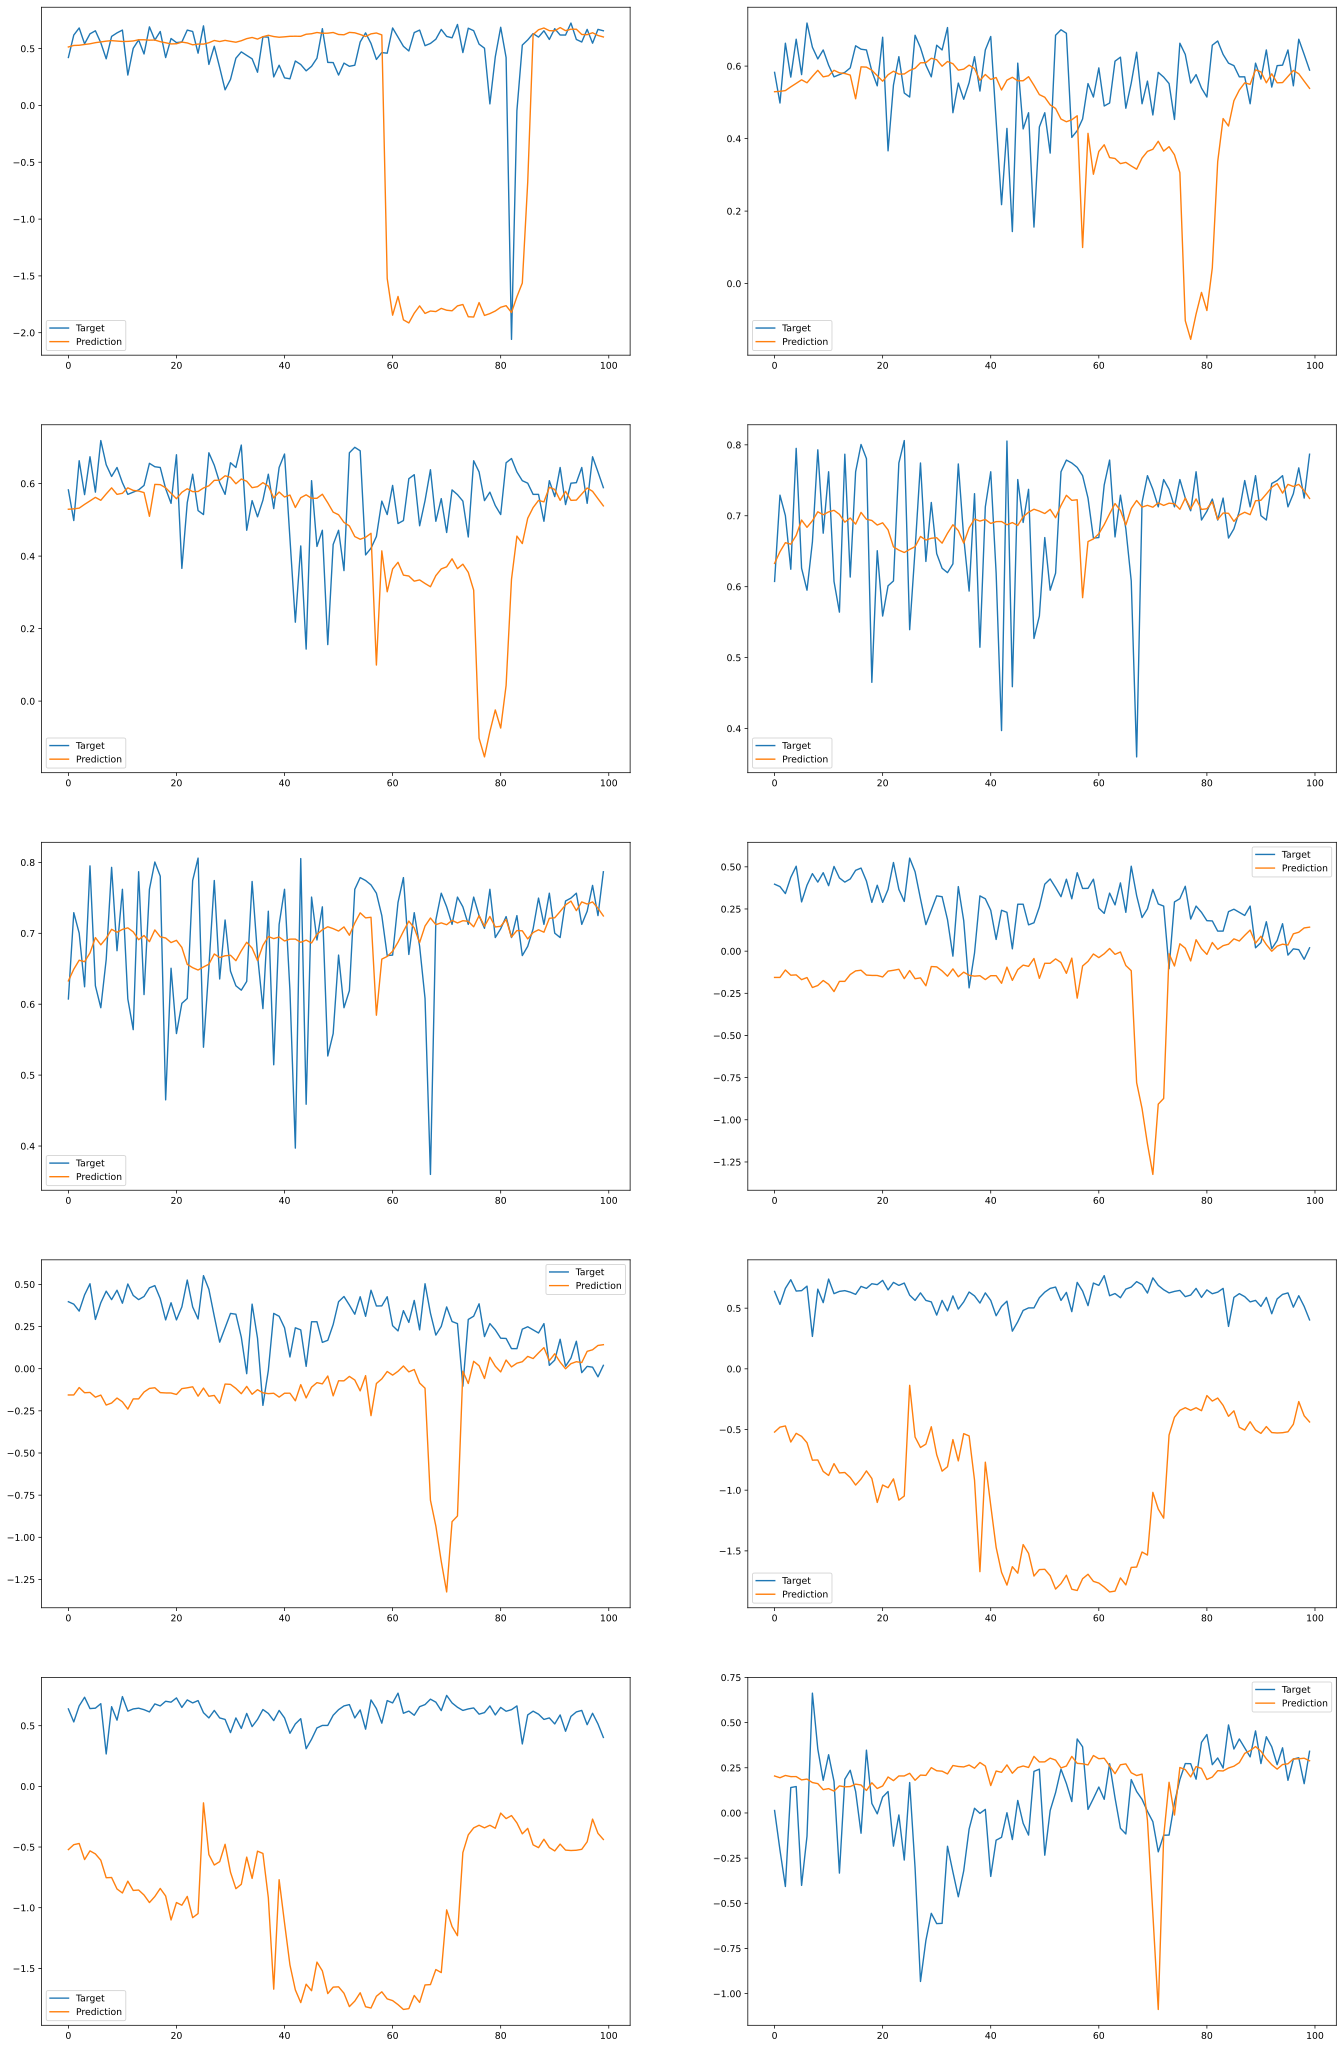

In [118]:
nrow = 5
ncol = 2

f, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(5*nrow, 20*ncol), dpi=70)

for ii in range(nrow):
    for jj in range(ncol):
        axes[ii,jj].plot(targets[ii+jj, 2000:2000+100, 0], label='Target')
        axes[ii,jj].plot(pred[ii+jj, 3000:3000+100, 0], label='Prediction')
        axes[ii,jj].legend()
        
f.savefig('./prediction_result.pdf')